# Data profiling

In [2]:
import pandas as pd

df = pd.read_csv("train.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.isna().sum()/891*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

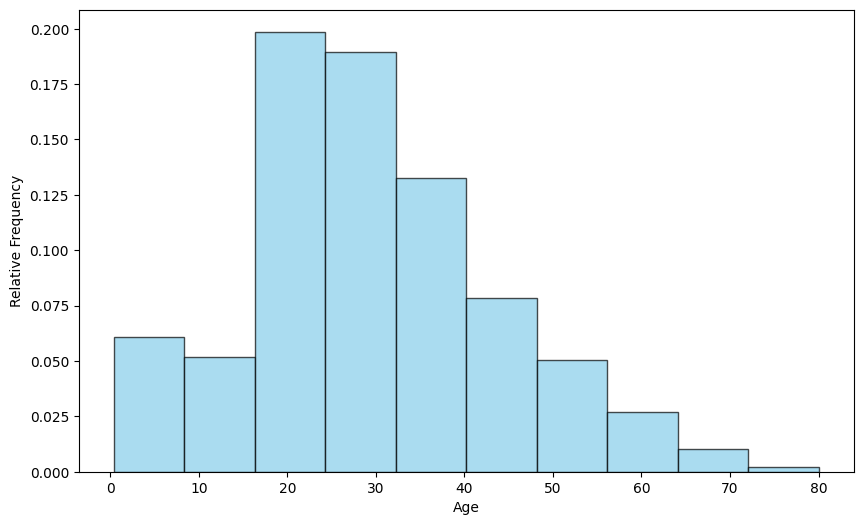

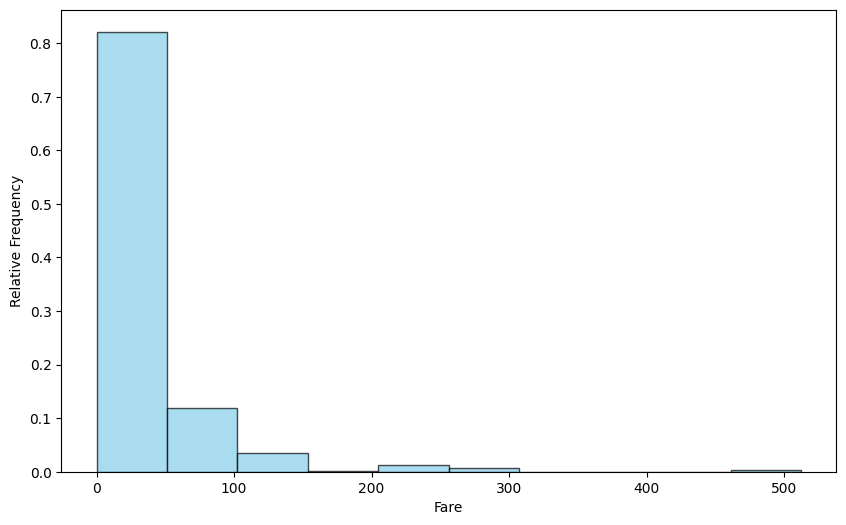

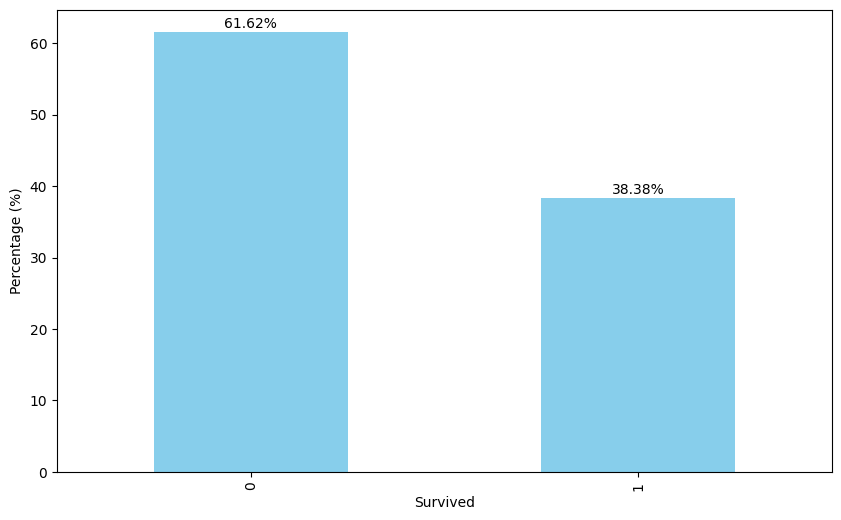

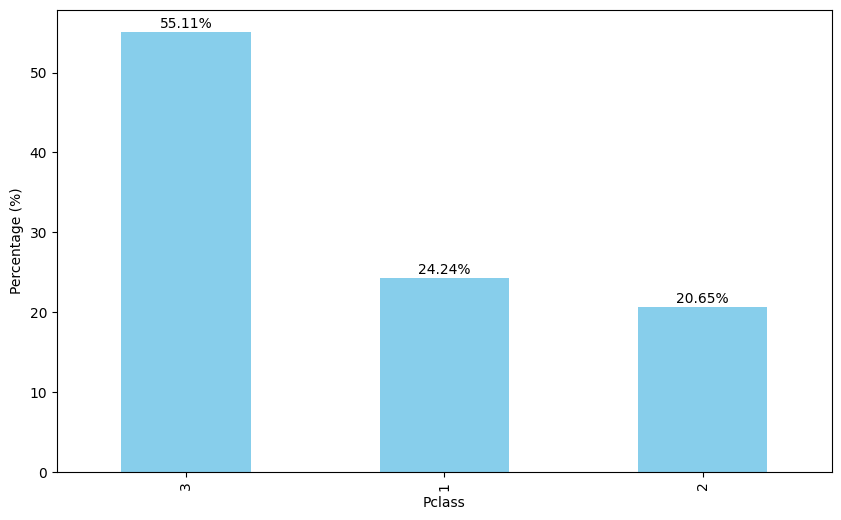

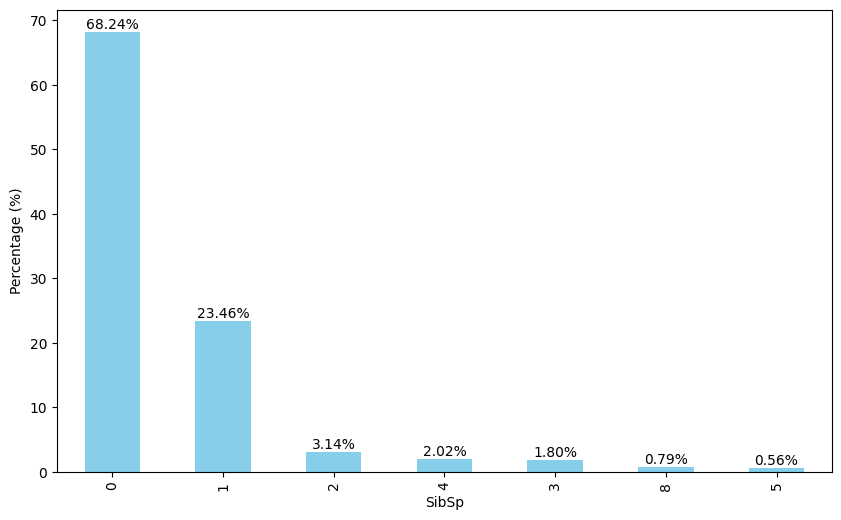

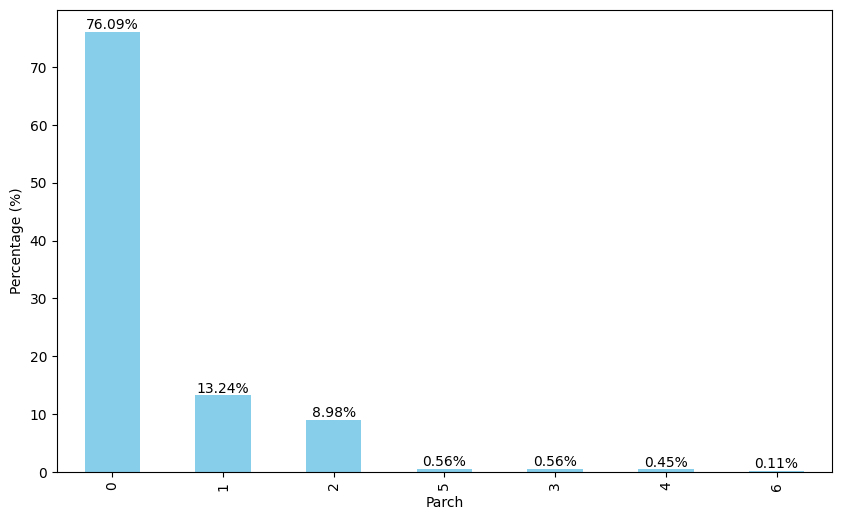

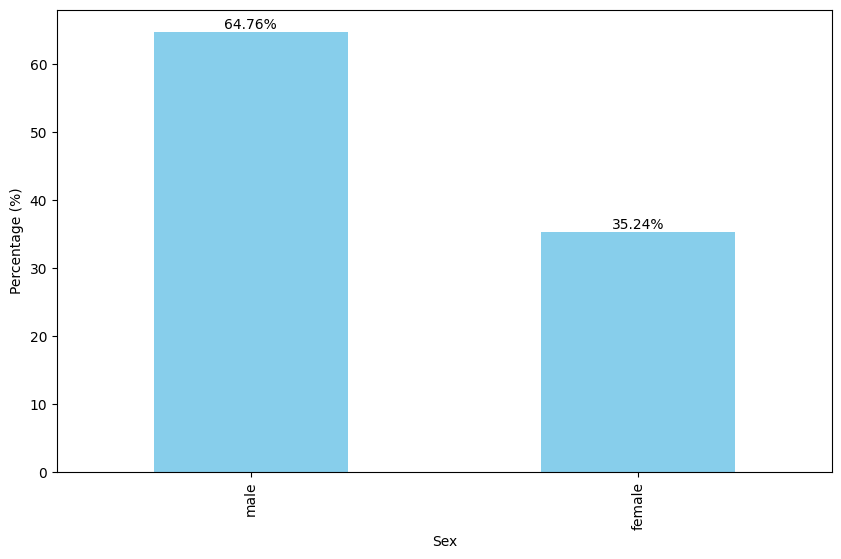

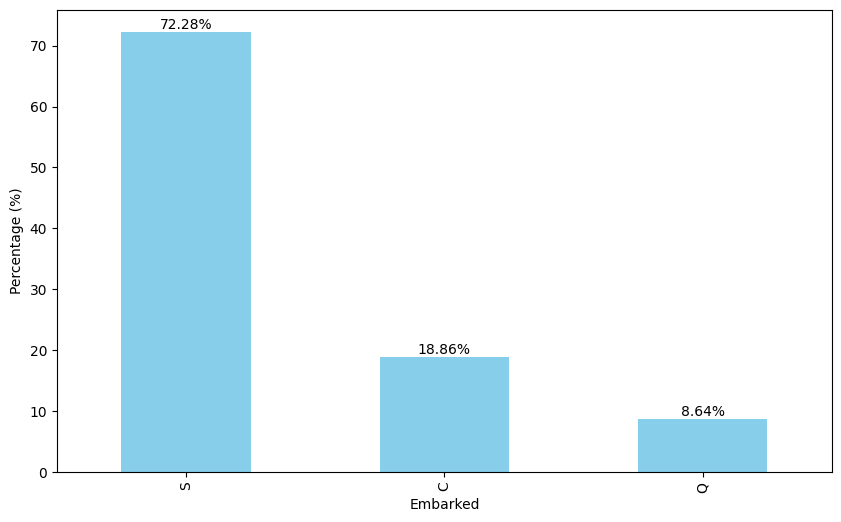

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_value_percentages(values: pd.Series):
    value_counts = values.value_counts()
    value_percentages = (value_counts / len(df)) * 100
    
    plt.figure(figsize=(10, 6))
    value_percentages.plot(kind='bar', color='skyblue')
    plt.xlabel(values.name)
    plt.ylabel('Percentage (%)')
    # Display the percentage above each bar
    for i, v in enumerate(value_percentages):
        plt.text(i, v + 0.5, f'{v:.2f}%', ha='center')
    
    plt.show()

def plot_histogram_relative_frequency(values: pd.Series, bins=20):
    plt.figure(figsize=(10, 6))
    plt.hist(values, bins=bins, color='skyblue', edgecolor='black', alpha=0.7,
             weights=np.ones(len(values)) / len(values))
    plt.xlabel(values.name)
    plt.ylabel('Relative Frequency')
    plt.show()

plot_histogram_relative_frequency(df["Age"], bins = 10)
plot_histogram_relative_frequency(df["Fare"], bins = 10)
plot_value_percentages(df["Survived"])
plot_value_percentages(df["Pclass"])
plot_value_percentages(df["SibSp"])
plot_value_percentages(df["Parch"])
plot_value_percentages(df["Sex"])
plot_value_percentages(df["Embarked"])


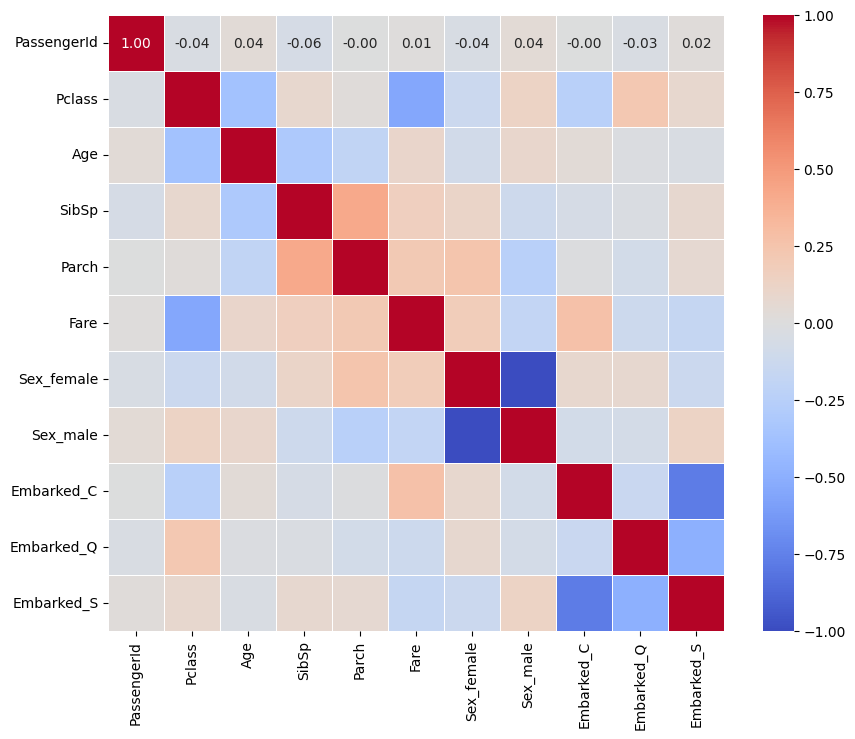

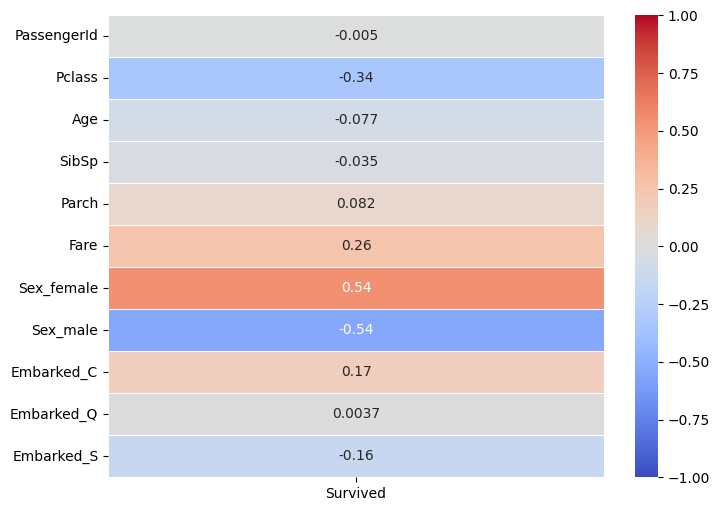

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_map(df):
    corr_matrix = df.corr()    
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True)    
    plt.show()

def plot_target_correlation_map(df, target_column):
    correlations = df.corr()[target_column].drop(target_column)
    correlations_df = pd.DataFrame(correlations)
    plt.figure(figsize=(8, 6))    
    sns.heatmap(correlations_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)    
    plt.show()



df_for_corr = df.drop(columns=["Name", "Ticket", "Cabin"])
df_for_corr = pd.get_dummies(df_for_corr, columns=["Sex", "Embarked"])
plot_correlation_map(df_for_corr.drop(columns=["Survived"]))
plot_target_correlation_map(df_for_corr, "Survived")

In [7]:
import seaborn
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate

def plotAttributesAgainstClass(df: pd.DataFrame, x: str, y: str, target_column: str) -> None:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x = x, y = y, hue = target_column, data = df)

def compareAttributesAgainstClass(df: pd.DataFrame, x: str, y: str, target_column: str) -> None:
    # Grouping by the two columns and calculating the mean survival rate
    survival_prob = df.groupby([x, y])[target_column].mean().reset_index()
    survival_prob.columns = [x, y, 'Survival Probability']

    # Pivot the table for easier reading
    pivot_table = survival_prob.pivot(index=x, columns=y, values='Survival Probability')

    # DataFrame to list of lists for tabulate
    table_dict = pivot_table.to_dict()
    y_values = list(table_dict.keys())
    table_list = [[f"{x}\{y}"] + y_values]
    x_values = list(table_dict[y_values[0]].keys())
    for xv in x_values:
        lst = [xv]
        for yv in y_values:
            lst.append(table_dict[yv][xv])
        table_list.append(lst)


    print(tabulate(table_list, headers="", tablefmt="fancy_grid"))

╒════════════╤════════════════════╤═════════════════════╕
│ Pclass\Sex │ female             │ male                │
├────────────┼────────────────────┼─────────────────────┤
│ 1          │ 0.9680851063829787 │ 0.36885245901639346 │
├────────────┼────────────────────┼─────────────────────┤
│ 2          │ 0.9210526315789473 │ 0.1574074074074074  │
├────────────┼────────────────────┼─────────────────────┤
│ 3          │ 0.5                │ 0.13544668587896252 │
╘════════════╧════════════════════╧═════════════════════╛
╒══════════════╤══════════╤══════════╤══════════╤═══════════╤════════════╤═════╤═════╕
│ Pclass\SibSp │ 0        │ 1        │ 2        │ 3         │   4        │   5 │   8 │
├──────────────┼──────────┼──────────┼──────────┼───────────┼────────────┼─────┼─────┤
│ 1            │ 0.562044 │ 0.746479 │ 0.8      │ 0.666667  │ nan        │ nan │ nan │
├──────────────┼──────────┼──────────┼──────────┼───────────┼────────────┼─────┼─────┤
│ 2            │ 0.416667 │ 0.581818 │ 0.5 

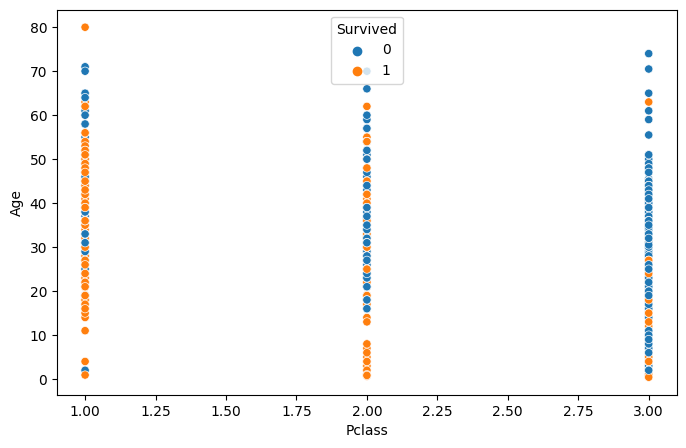

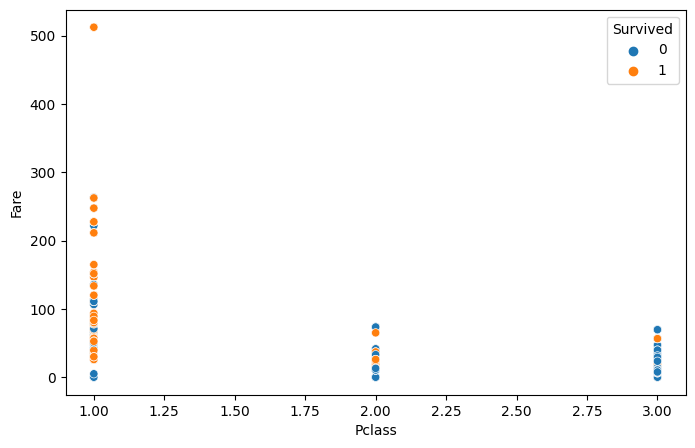

In [8]:

compareAttributesAgainstClass(df, "Pclass", "Sex", "Survived")
plotAttributesAgainstClass(df, "Pclass", "Age", "Survived")
compareAttributesAgainstClass(df, "Pclass", "SibSp", "Survived")
compareAttributesAgainstClass(df, "Pclass", "Parch", "Survived")
plotAttributesAgainstClass(df, "Pclass", "Fare", "Survived")
compareAttributesAgainstClass(df, "Pclass", "Embarked", "Survived")


╒═══════════╤══════════╤══════════╤══════════╤══════════╤═══════════╤═══╤═══╕
│ Sex\SibSp │ 0        │ 1        │ 2        │ 3        │ 4         │ 5 │ 8 │
├───────────┼──────────┼──────────┼──────────┼──────────┼───────────┼───┼───┤
│ female    │ 0.787356 │ 0.754717 │ 0.769231 │ 0.363636 │ 0.333333  │ 0 │ 0 │
├───────────┼──────────┼──────────┼──────────┼──────────┼───────────┼───┼───┤
│ male      │ 0.168203 │ 0.31068  │ 0.2      │ 0        │ 0.0833333 │ 0 │ 0 │
╘═══════════╧══════════╧══════════╧══════════╧══════════╧═══════════╧═══╧═══╛
╒═══════════╤══════════╤══════════╤══════════╤══════╤═══╤══════╤═════╕
│ Sex\Parch │ 0        │ 1        │ 2        │ 3    │ 4 │ 5    │   6 │
├───────────┼──────────┼──────────┼──────────┼──────┼───┼──────┼─────┤
│ female    │ 0.78866  │ 0.766667 │ 0.612245 │ 0.75 │ 0 │ 0.25 │   0 │
├───────────┼──────────┼──────────┼──────────┼──────┼───┼──────┼─────┤
│ male      │ 0.165289 │ 0.327586 │ 0.322581 │ 0    │ 0 │ 0    │ nan │
╘═══════════╧══════════╧════

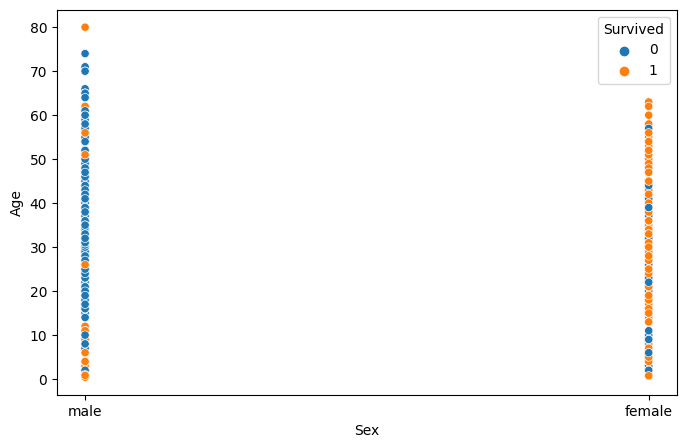

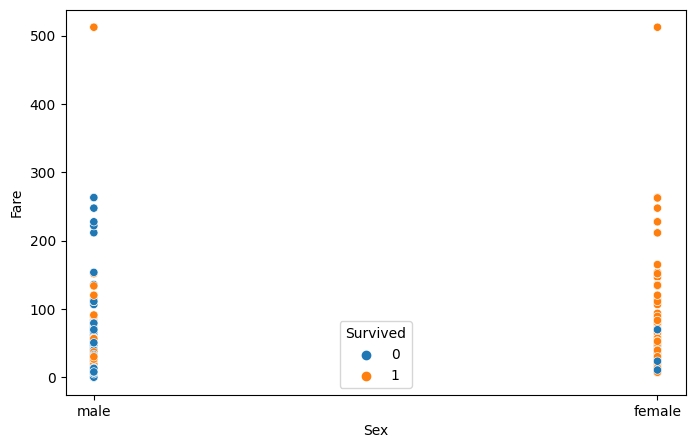

In [9]:

plotAttributesAgainstClass(df, "Sex", "Age", "Survived")
compareAttributesAgainstClass(df, "Sex", "SibSp", "Survived")
compareAttributesAgainstClass(df, "Sex", "Parch", "Survived")
plotAttributesAgainstClass(df, "Sex", "Fare", "Survived")
compareAttributesAgainstClass(df, "Sex", "Embarked", "Survived")


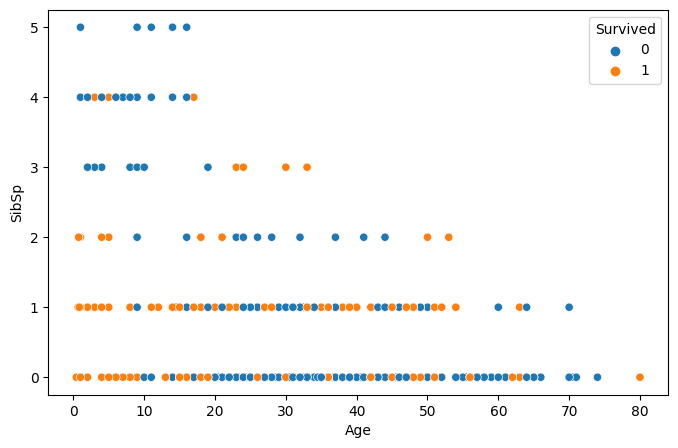

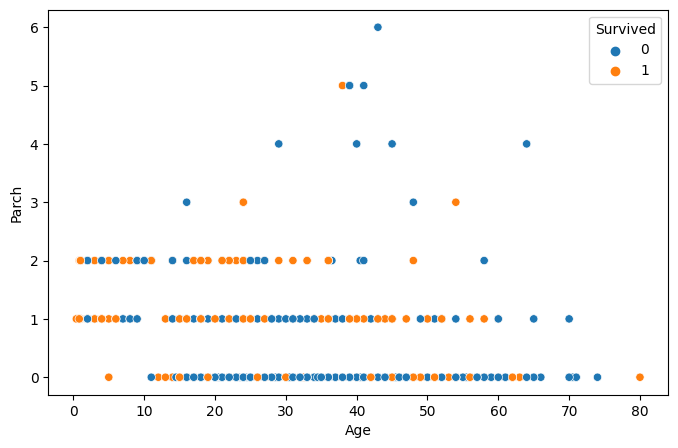

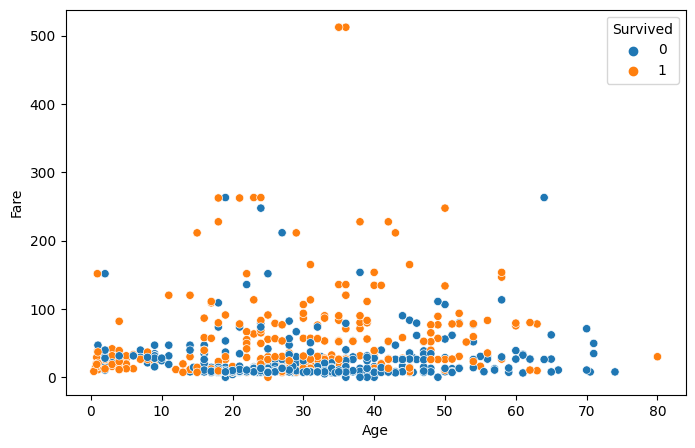

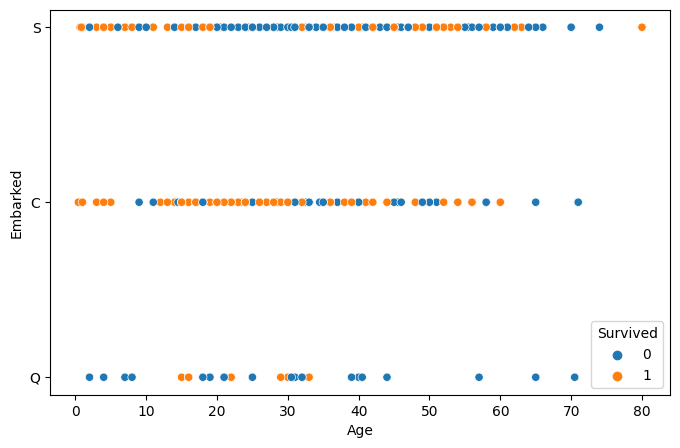

In [10]:

plotAttributesAgainstClass(df, "Age", "SibSp", "Survived")
plotAttributesAgainstClass(df, "Age", "Parch", "Survived")
plotAttributesAgainstClass(df, "Age", "Fare", "Survived")
plotAttributesAgainstClass(df, "Age", "Embarked", "Survived")



╒═════════════╤════════════╤════════════╤══════════╤════════════╤═════╤════════════╤═════╕
│ SibSp\Parch │   0        │   1        │ 2        │   3        │   4 │   5        │   6 │
├─────────────┼────────────┼────────────┼──────────┼────────────┼─────┼────────────┼─────┤
│ 0           │   0.303538 │   0.657895 │ 0.724138 │   1        │   0 │   0        │ nan │
├─────────────┼────────────┼────────────┼──────────┼────────────┼─────┼────────────┼─────┤
│ 1           │   0.520325 │   0.596491 │ 0.631579 │   0.333333 │   0 │   0.333333 │   0 │
├─────────────┼────────────┼────────────┼──────────┼────────────┼─────┼────────────┼─────┤
│ 2           │   0.25     │   0.857143 │ 0.5      │   1        │ nan │ nan        │ nan │
├─────────────┼────────────┼────────────┼──────────┼────────────┼─────┼────────────┼─────┤
│ 3           │   1        │   0        │ 0.285714 │ nan        │ nan │ nan        │ nan │
├─────────────┼────────────┼────────────┼──────────┼────────────┼─────┼────────────┼─────┤

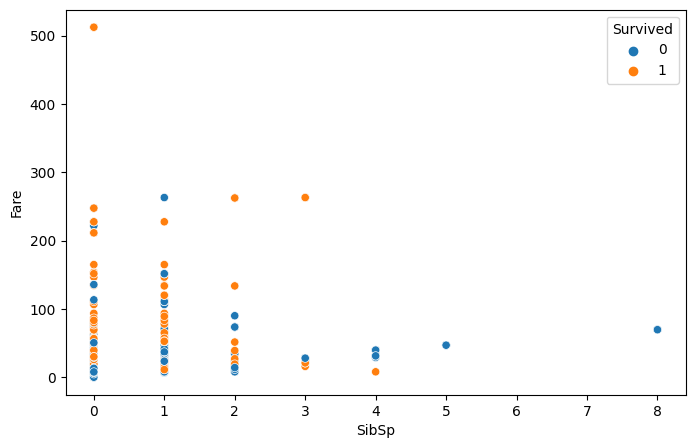

In [11]:

compareAttributesAgainstClass(df, "SibSp", "Parch", "Survived")
plotAttributesAgainstClass(df, "SibSp", "Fare", "Survived")
compareAttributesAgainstClass(df, "SibSp", "Embarked", "Survived")


╒════════════════╤════════════════════╤═════════════════════╤═════════════════════╕
│ Parch\Embarked │ C                  │ Q                   │ S                   │
├────────────────┼────────────────────┼─────────────────────┼─────────────────────┤
│ 0              │ 0.5121951219512195 │ 0.43478260869565216 │ 0.28512396694214875 │
├────────────────┼────────────────────┼─────────────────────┼─────────────────────┤
│ 1              │ 0.6333333333333333 │ 0.0                 │ 0.5609756097560976  │
├────────────────┼────────────────────┼─────────────────────┼─────────────────────┤
│ 2              │ 0.7142857142857143 │ 0.0                 │ 0.46153846153846156 │
├────────────────┼────────────────────┼─────────────────────┼─────────────────────┤
│ 3              │ 1.0                │ nan                 │ 0.5                 │
├────────────────┼────────────────────┼─────────────────────┼─────────────────────┤
│ 4              │ nan                │ nan                 │ 0.0           

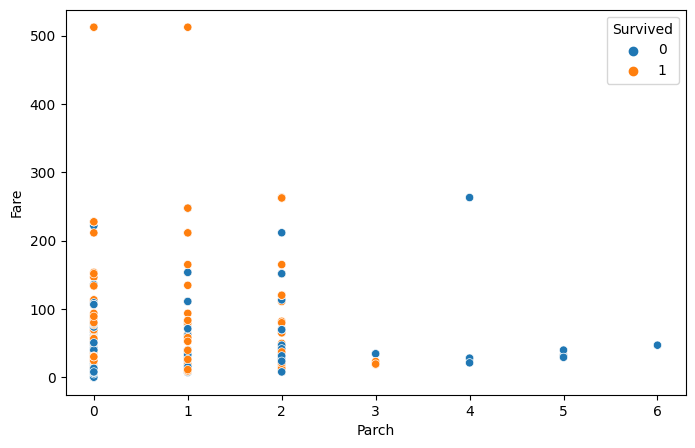

In [12]:

plotAttributesAgainstClass(df, "Parch", "Fare", "Survived")
compareAttributesAgainstClass(df, "Parch", "Embarked", "Survived")


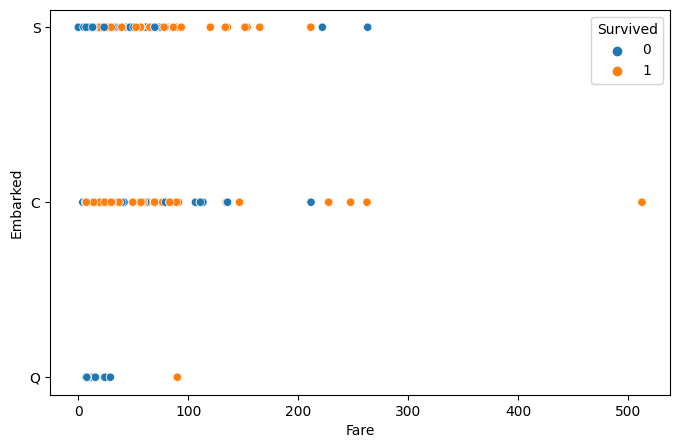

In [13]:

plotAttributesAgainstClass(df, "Fare", "Embarked", "Survived")

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

def analyse_distribution(data: pd.Series, name: str) -> None:
    # Histogram and KDE plot
    plt.figure(figsize=(8, 5))
    sns.histplot(data, kde=True, stat="density", bins=30)
    plt.title(f'{name} Distribution')
    plt.xlabel(f'{name}')
    plt.ylabel('Density')
    plt.show()

    # Distributions to check
    distributions = [stats.norm, stats.gamma, stats.lognorm, stats.chi2, stats.chi]

    # Fit each distribution and plot the results
    plt.figure(figsize=(8, 5))
    sns.histplot(data, kde=False, stat="density", bins=30, label='Data')

    x = np.linspace(min(data), max(data), 1000)
    for distribution in distributions:
        params = distribution.fit(data)
        plt.plot(x, distribution.pdf(x, *params), label=distribution.name)

    plt.title(f'{name} Distribution Fit')
    plt.xlabel(f'{name}')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    # Kolmogorov-Smirnov test for normal distribution
    ks_statistic, p_value = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    print(f"KS test for normal distribution: Statistic={ks_statistic}, p-value={p_value}")

    # Calculate AIC and BIC for each distribution
    aic_bic = []
    for distribution in distributions:
        params = distribution.fit(data)
        log_likelihood = np.sum(distribution.logpdf(data, *params))
        k = len(params)
        n = len(data)
        
        aic = 2*k - 2*log_likelihood
        bic = k*np.log(n) - 2*log_likelihood
        
        aic_bic.append((distribution.name, aic, bic))

    # Display results
    aic_bic_df = pd.DataFrame(aic_bic, columns=['Distribution', 'AIC', 'BIC'])
    print(aic_bic_df.sort_values(by='AIC'))


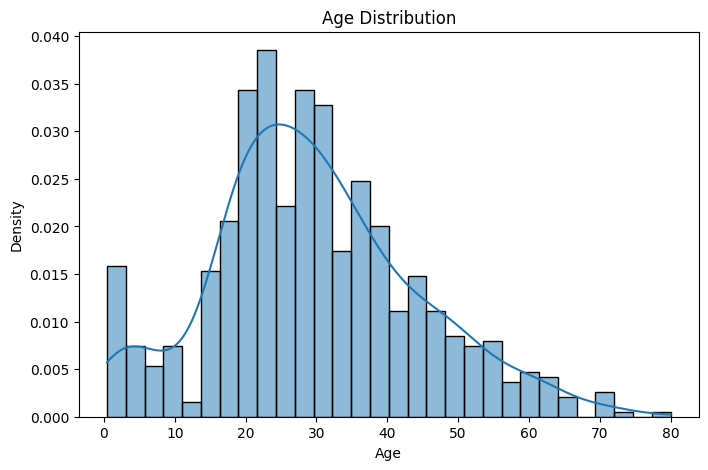

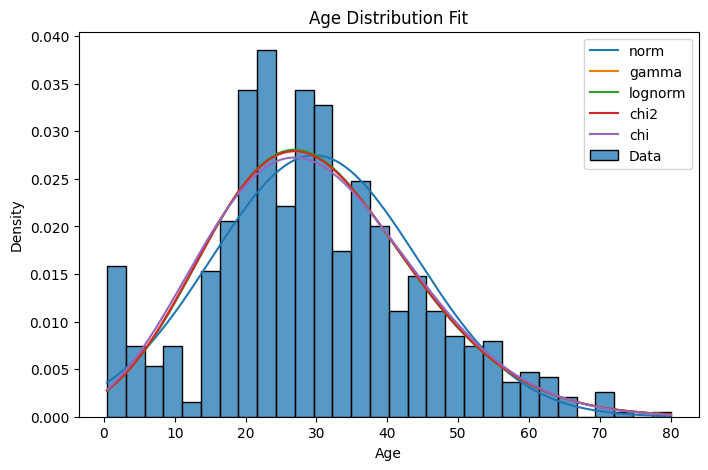

KS test for normal distribution: Statistic=0.06456656793494475, p-value=0.004958146899084225
  Distribution          AIC          BIC
4          chi  5834.424195  5848.136844
1        gamma  5834.489998  5848.202647
3         chi2  5834.489998  5848.202647
2      lognorm  5834.497490  5848.210139
0         norm  5850.534945  5859.676711


In [15]:
analyse_distribution(df['Age'].dropna(), "Age")

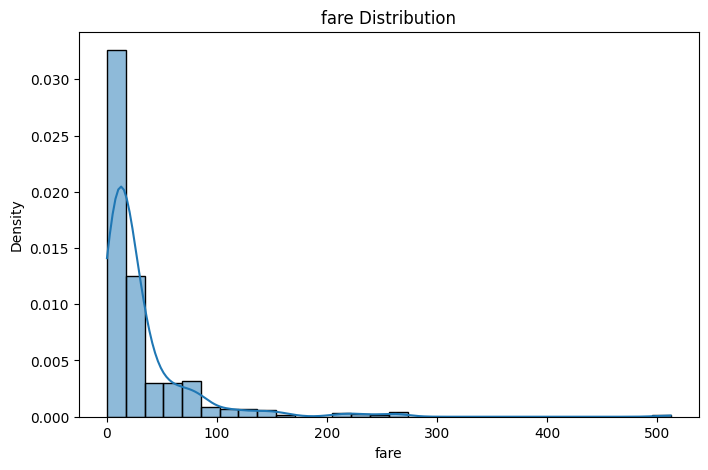

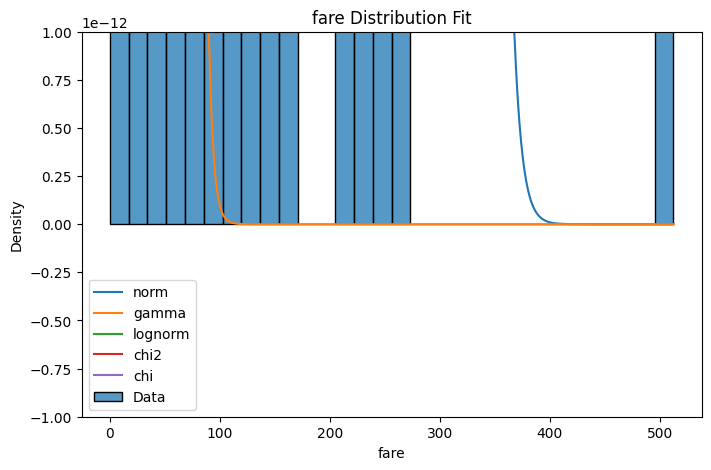

KS test for normal distribution: Statistic=0.28184804098597455, p-value=4.179692707891544e-63
  Distribution           AIC           BIC
2      lognorm  -6505.228105  -6490.851071
4          chi   7517.075906   7531.452939
3         chi2   7786.465560   7800.842593
0         norm   9491.813061   9501.397750
1        gamma  21839.338344  21853.715378


In [16]:
analyse_distribution(df['Fare'].dropna(), "fare")